In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [58]:
df_NoIBDd = pd.read_pickle("MissedIBDdinIBDp.pkl")
df_NoIBDd

,evtType,R,recE,ratioAP,ratioSN,fileNo,detID,detIDs,recX,recY,...,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource,TagSingle,R^3,Truth_Partner
305,IBDp,16.086712,76.020782,0.013340,0.982514,0,276,[276],-5794.425781,-14456.377930,...,0,-1,0.999494,1,0,0,-1,1,4162.956614,-1
586,IBDp,16.499916,34.461502,0.012017,0.977779,1,4,[4],995.498108,-8270.547852,...,0,-1,0.983961,1,0,0,-1,1,4492.056610,-1
804,IBDp,16.439967,21.921597,0.012230,0.972088,1,163,[163],-15454.309570,-3986.782227,...,0,-1,0.999809,1,0,0,-1,1,4443.271025,-1
1307,IBDp,15.257114,37.299675,0.012829,0.978092,2,5,[5],9034.487305,-12142.192383,...,0,-1,0.999975,1,0,0,-1,1,3551.544058,-1
1360,IBDp,16.263497,19.885834,0.012226,0.971522,2,42,[42],-5167.495605,8385.449219,...,0,-1,0.999684,1,0,0,-1,1,4301.716874,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11684,IBDp,5.647892,13.610205,0.012448,0.960074,16,165,[165],2393.156250,5087.104004,...,0,-1,0.992596,1,0,0,-1,1,180.160370,-1
15950,IBDp,8.042709,13.267071,0.012362,0.960822,23,167,[167],3297.220947,-6991.805664,...,0,-1,0.995785,1,0,0,-1,1,520.243924,-1
16248,IBDp,15.496066,18.914162,0.012231,0.970821,23,420,[420],13718.974609,-4176.753906,...,0,-1,0.999906,1,0,0,-1,1,3721.040125,-1
16666,IBDp,16.883146,26.306379,0.011673,0.974739,24,303,[303],-13878.297852,9210.821289,...,0,-1,0.990244,1,0,0,-1,1,4812.382793,-1


In [111]:
from LoadMultiFiles import LoadOneFileUproot
from PlotDetectorGeometry import GetR_XYZ
import os
from copy import copy
v_fileNo = range(40)

df_detTruth = None

for i in list(v_fileNo):
    if not os.path.exists(f"/junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/1/10/0/{i}/det_user.root"):
        print(f"Continue /junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/1/10/0/{i}/det_user.root")
        continue
    dict_nCapture = LoadOneFileUproot(f"/junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/1/10/0/{i}/det_user.root",
                                   name_branch="nCapture", return_list=False)
    dict_primary_track = LoadOneFileUproot(f"/junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/1/10/0/{i}/det_user.root",
                                      name_branch="prmtrkdep", return_list=False)
    dict_nCapture["fileNo"] = [i]*len(dict_nCapture["evtID"])
    dict_nCapture["max_kine"] = [np.max(v_kine) if len(v_kine)>0 else 0 for v_kine in dict_nCapture["kine"]]
    dict_nCapture["NCStopR"] = GetR_XYZ(dict_nCapture["NCStopX"], dict_nCapture["NCStopY"], dict_nCapture["NCStartZ"])

    df_nCapture_tmp = pd.DataFrame.from_dict(dict_nCapture)
    df_primary_track_tmp = pd.DataFrame.from_dict(dict_primary_track)
    df_all_info_temp = pd.concat((df_nCapture_tmp, df_primary_track_tmp), axis=1)
    if df_detTruth is None:
        df_detTruth = copy(df_all_info_temp)
    else:
        df_detTruth = pd.concat((df_detTruth, df_all_info_temp), axis=0)

Continue /junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/1/10/0/15/det_user.root


## Concatenate results

In [113]:
df_detTruth_NoIBDd = None
for fileNo in v_fileNo:
    df_detTruth_NoIBDd_tmp = df_detTruth[df_detTruth["fileNo"]==fileNo].loc[ df_NoIBDd[df_NoIBDd["fileNo"]==fileNo]["detID"].tolist()]
    if df_detTruth_NoIBDd is None:
        df_detTruth_NoIBDd = copy(df_detTruth_NoIBDd_tmp)
    else:
        df_detTruth_NoIBDd = pd.concat( (df_detTruth_NoIBDd, df_detTruth_NoIBDd_tmp), axis=0)

Text(0.5, 0, 'Gamma Kinetic Energy of Neutron Capture [ MeV ]')

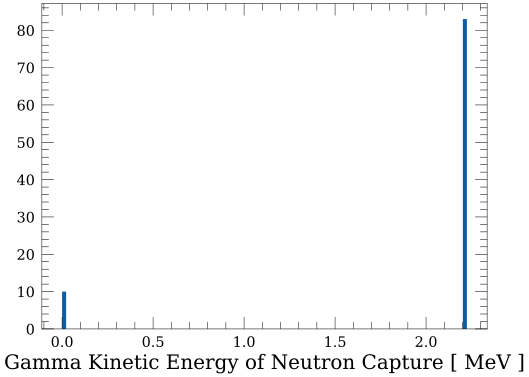

In [114]:
plt.hist(df_detTruth_NoIBDd["max_kine"], bins=100)
plt.xlabel("Gamma Kinetic Energy of Neutron Capture [ MeV ]")


In [115]:
display(df_detTruth_NoIBDd)
df_detTruth_NoIBDd[df_detTruth_NoIBDd["max_kine"]<1][["PDGID","pdgid","edepNotInLS"]]

,evtID,NeutronTrkid,NeutronKine,NeutronCaptureT,NCStartX,NCStartY,NCStartZ,NCStopX,NCStopY,NCStopZ,...,TrackID,edep,edepX,edepY,edepZ,Qedep,QedepX,QedepY,QedepZ,edepNotInLS
276,276,[2],[0.83335376],[49061.2471579462],[-5804.132],[-14325.604],[3789.2742],[-5742.125],[-14225.359],[3846.1028],...,"[1, 2]","[73.34191, 0.8338005]","[-5751.932, -5816.637]","[-14464.91, -14290.762]","[4076.6914, 3776.968]","[72.06592, 0.24639453]","[-5752.033, -5814.6]","[-14464.538, -14294.8]","[4076.0251, 3779.954]","[0.0, 0.0]"
4,4,[2],[0.60690486],[163932.686582599],[1091.902],[-8329.999],[14138.61],[1111.6223],[-8278.237],[14226.161],...,"[1, 2]","[32.852905, 0.60723484]","[1018.3749, 1134.8561]","[-8287.572, -8324.336]","[14165.694, 14161.218]","[32.232006, 0.28851953]","[1018.8446, 1124.5486]","[-8287.819, -8327.753]","[14166.225, 14156.9375]","[0.0, 0.0]"
163,163,[2],[0.10071665],[722760.0711700919],[-15435.915],[-3934.831],[3915.2566],[-15532.022],[-3815.1187],[3897.1204],...,"[1, 2]","[20.809286, 0.100785255]","[-15473.346, -15433.799]","[-3949.1448, -3933.138]","[3966.723, 3915.8225]","[20.394154, 0.10068067]","[-15472.372, -15433.802]","[-3949.8013, -3933.139]","[3965.4556, 3915.823]","[0.0, 0.0]"
5,5,[2],[2.2823486],[472191.8433846223],[9082.537],[-12155.949],[1943.0072],[9061.066],[-12239.953],[2089.7068],...,"[1, 2]","[34.504803, 2.2835917]","[9081.453, 9082.377]","[-12220.86, -12154.572]","[1879.4537, 1946.0798]","[33.913795, 0.8017539]","[9081.624, 9082.41]","[-12220.779, -12154.341]","[1879.5549, 1946.0217]","[0.0, 0.0]"
42,42,[2],[0.22037801],[271983.019127313],[-5153.286],[8342.254],[12914.685],[-5109.5083],[8420.324],[12888.759],...,"[1, 2]","[18.850746, 0.22050446]","[-5162.584, -5150.1436]","[8386.254, 8331.398]","[12940.183, 12919.771]","[18.51428, 0.22035773]","[-5162.9126, -5150.1426]","[8386.153, 8331.3955]","[12940.04, 12919.771]","[0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,165,[2],[0.034753077],[357120.5528452234],[2423.7244],[5138.856],[-632.0641],[2359.024],[5143.147],[-712.41846],...,"[1, 2]","[13.112315, 0.034779903]","[2402.7017, 2428.8193]","[5127.727, 5139.805]","[-596.9491, -634.19977]","[12.846468, 0.0347757]","[2402.9348, 2428.8196]","[5127.462, 5139.805]","[-597.52454, -634.1998]","[0.0, 0.0]"
167,167,[],[],[],[],[],[],[],[],[],...,"[1, 2]","[12.62837, 0.8553285]","[3211.9553, 3194.002]","[-7038.626, -7064.8364]","[-2211.3577, -2209.1985]","[12.332464, 0.2575834]","[3211.8977, 3194.2485]","[-7039.276, -7077.552]","[-2211.4263, -2204.9358]","[0.0, 0.0]"
420,420,[],[],[],[],[],[],[],[],[],...,"[1, 2]","[17.716965, 0.8743056]","[13742.868, 13901.323]","[-4175.15, -4151.2163]","[-5925.8335, -5960.967]","[17.319344, 0.35463506]","[13743.349, 13847.009]","[-4175.1353, -4150.652]","[-5925.5156, -5956.5654]","[0.0, 0.0]"
303,303,[2],[0.27696097],[166758.8994767376],[-13900.856],[9297.324],[-2800.8389],[-13834.982],[9305.475],[-2788.912],...,"[1, 2]","[25.529821, 0.27711603]","[-13924.001, -13894.775]","[9247.645, 9318.635]","[-2751.1367, -2786.2559]","[25.05967, 0.1338056]","[-13923.132, -13896.574]","[9247.261, 9311.836]","[-2751.3213, -2791.1584]","[0.0, 2.2243845]"


,PDGID,pdgid,edepNotInLS
47,"[-11, 2112]",[],"[0.0, 0.0]"
53,"[-11, 2112]",[],"[0.0, 0.0]"
217,"[-11, 2112]",[],"[0.0, 0.0]"
157,"[-11, 2112]",[],"[0.0, 0.0]"
470,"[-11, 2112]",[],"[0.0, 0.0]"
366,"[-11, 2112]",[],"[0.0, 0.0]"
110,"[-11, 2112]",[],"[0.0, 0.0]"
56,"[-11, 2112]",[],"[0.0, 0.0]"
167,"[-11, 2112]",[],"[0.0, 0.0]"
420,"[-11, 2112]",[],"[0.0, 0.0]"


Text(0.5, 1.0, 'IBDd of Missed IBDp')

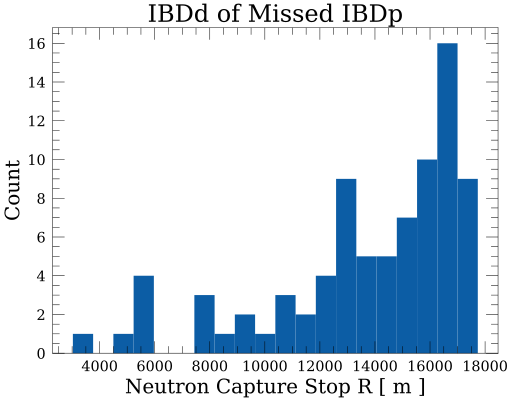

In [121]:
plt.hist( np.concatenate( np.array(df_detTruth_NoIBDd["NCStopR"])), bins=20 )
plt.xlabel("Neutron Capture Stop R [ m ]")
plt.ylabel("Count")
plt.title("IBDd of Missed IBDp")

